In [ ]:
# Análisis Estadístico del Dataset Adult Census
# Proyecto Integrador - Ejercicio 1

# NOTAS: Esta celda inicial configura el entorno de trabajo para el análisis estadístico del dataset Adult Census.
# Se importan todas las librerías necesarias para manipulación de datos, visualización y análisis estadístico.
# También se configuran parámetros globales para que los gráficos tengan un estilo consistente y profesional.

# Importar librerías necesarias
import pandas as pd  # Para manipulación y análisis de datos estructurados
import numpy as np   # Para operaciones numéricas y cálculos matemáticos
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import seaborn as sns  # Para gráficos estadísticos más avanzados y atractivos
from sklearn.preprocessing import LabelEncoder  # Para codificar variables categóricas
import warnings
warnings.filterwarnings('ignore')  # Suprimir advertencias para que la salida sea más limpia

# Configurar estilo de visualizaciones
plt.style.use('seaborn-v0_8')  # Usar estilo seaborn para gráficos más profesionales
sns.set_palette("husl")  # Configurar paleta de colores para gráficos
plt.rcParams['figure.figsize'] = (12, 8)  # Establecer tamaño por defecto de las figuras

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [ ]:
# NOTAS: Esta celda carga el dataset Adult Census desde el archivo adult.data.
# El dataset no tiene encabezados, por lo que definimos manualmente los nombres de las columnas
# basándonos en la documentación del archivo adult.names. También especificamos que '?' 
# representa valores faltantes para que pandas los reconozca como NaN.

# Cargar dataset Adult Census
# Definir nombres de columnas según adult.names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Cargar datos
# na_values='?' le dice a pandas que trate los '?' como valores faltantes (NaN)
df = pd.read_csv('../datos/adult.data', names=column_names, na_values='?')

print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
df.head()


Dataset cargado: 32561 filas, 15 columnas

Primeras 5 filas:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# NOTAS: Esta celda realiza una inspección inicial del dataset para entender su estructura y calidad.
# Se examina la información general (tipos de datos, memoria), se cuentan los valores faltantes
# y se obtienen estadísticas descriptivas básicas de las variables numéricas.
# Esta exploración es fundamental antes de proceder con cualquier análisis.

# Inspección inicial del dataset
print("Información del dataset:")
print(df.info())  # Muestra tipos de datos, memoria usada y conteo de valores no nulos
print("\n" + "="*50)
print("Valores faltantes por columna:")
print(df.isnull().sum())  # Cuenta valores faltantes (NaN) en cada columna
print("\n" + "="*50)
print("Estadísticas descriptivas básicas:")
df.describe()  # Estadísticas descriptivas para variables numéricas (media, desv. estándar, etc.)


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Valores faltantes por columna:
age               0
workclass  

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# NOTAS: Esta celda prepara y limpia los datos para el análisis.
# Primero elimina filas con valores faltantes y luego convierte la variable objetivo 'income'
# de categórica a binaria (0/1) para facilitar los análisis estadísticos posteriores.
# La variable binaria es más fácil de interpretar: 1 = gana más de 50K, 0 = gana 50K o menos.

# Preparación de datos
# Eliminar filas con valores faltantes
print(f"Filas antes de limpiar: {len(df)}")
df_clean = df.dropna()  # Elimina cualquier fila que tenga al menos un valor faltante
print(f"Filas después de limpiar: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

# Codificar variable income a binario (1 para >50K, 0 para <=50K)
# Convierte la variable categórica 'income' en una variable binaria numérica
df_clean['income_binary'] = (df_clean['income'] == '>50K').astype(int)

print("\nDistribución de income original:")
print(df_clean['income'].value_counts())  # Muestra conteos de las categorías originales
print("\nDistribución de income binario:")
print(df_clean['income_binary'].value_counts())  # Muestra conteos de la versión binaria


Filas antes de limpiar: 32561
Filas después de limpiar: 32561
Filas eliminadas: 0

Distribución de income original:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Distribución de income binario:
income_binary
0    32561
Name: count, dtype: int64


In [ ]:
# NOTAS: Esta celda clasifica las variables del dataset en dos grupos: numéricas y categóricas.
# Esta clasificación es fundamental porque cada tipo de variable requiere diferentes técnicas
# de análisis estadístico. Las variables numéricas permiten cálculos como media, mediana,
# correlaciones, etc., mientras que las categóricas se analizan con frecuencias y tablas de contingencia.

# Definir variables numéricas y categóricas
numerical_vars = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_binary']
categorical_vars = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

print("Variables numéricas:", numerical_vars)  # Variables que contienen valores numéricos continuos o discretos
print("Variables categóricas:", categorical_vars)  # Variables que contienen categorías o etiquetas
print(f"\nDataset final: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")


Variables numéricas: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_binary']
Variables categóricas: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

Dataset final: 32561 filas, 16 columnas


In [ ]:
# =============================================================================
# TAREAS 1-5: ESTADÍSTICAS DESCRIPTIVAS
# =============================================================================

# NOTAS: Esta celda inicia el análisis estadístico descriptivo calculando la media (promedio)
# para todas las variables numéricas. La media es una medida de tendencia central que nos dice
# el valor promedio de cada variable. Para income_binary, la media representa el porcentaje
# de personas que ganan más de 50K, lo cual es una métrica importante del dataset.

# Tarea 1: Media para variables numéricas
print("TAREA 1: MEDIA")
print("="*50)
media = df_clean[numerical_vars].mean()  # Calcula la media aritmética de todas las variables numéricas
print(media)
print(f"\nMedia de income_binary (porcentaje que gana >50K): {media['income_binary']:.4f} ({media['income_binary']*100:.2f}%)")


TAREA 1: MEDIA
age                   38.581647
fnlwgt            189778.366512
education_num         10.080679
capital_gain        1077.648844
capital_loss          87.303830
hours_per_week        40.437456
income_binary          0.000000
dtype: float64

Media de income_binary (porcentaje que gana >50K): 0.0000 (0.00%)


In [ ]:
# NOTAS: Esta celda calcula la mediana para todas las variables numéricas.
# La mediana es el valor que divide la distribución en dos partes iguales (50% de los valores
# están por encima y 50% por debajo). Es una medida de tendencia central más robusta que la media
# porque no se ve afectada por valores extremos (outliers). Es especialmente útil para
# variables como capital_gain y capital_loss que tienen muchos ceros.

# Tarea 2: Mediana para variables numéricas
print("\nTAREA 2: MEDIANA")
print("="*50)
mediana = df_clean[numerical_vars].median()  # Calcula el valor central de cada variable numérica
print(mediana)



TAREA 2: MEDIANA
age                   37.0
fnlwgt            178356.0
education_num         10.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        40.0
income_binary          0.0
dtype: float64


In [ ]:
# NOTAS: Esta celda calcula la moda (valor más frecuente) para todas las variables del dataset.
# La moda es especialmente útil para variables categóricas porque nos dice cuál es la categoría
# más común. Para variables numéricas, la moda nos indica el valor que aparece con mayor frecuencia.
# Es importante verificar si existe una moda única o si hay empates en las frecuencias.

# Tarea 3: Moda para TODAS las variables
print("\nTAREA 3: MODA")
print("="*50)
print("Moda de variables numéricas:")
for var in numerical_vars:
    moda = df_clean[var].mode()  # Encuentra el valor más frecuente
    if len(moda) > 0:
        print(f"{var}: {moda.iloc[0]}")  # Muestra la moda si existe
    else:
        print(f"{var}: Sin moda única")  # Indica si no hay moda única

print("\nModa de variables categóricas:")
for var in categorical_vars:
    moda = df_clean[var].mode()  # Encuentra la categoría más frecuente
    if len(moda) > 0:
        print(f"{var}: {moda.iloc[0]}")  # Muestra la moda si existe
    else:
        print(f"{var}: Sin moda única")  # Indica si no hay moda única



TAREA 3: MODA
Moda de variables numéricas:
age: 36
fnlwgt: 123011
education_num: 9
capital_gain: 0
capital_loss: 0
hours_per_week: 40
income_binary: 0

Moda de variables categóricas:
workclass:  Private
education:  HS-grad
marital_status:  Married-civ-spouse
occupation:  Prof-specialty
relationship:  Husband
race:  White
sex:  Male
native_country:  United-States


In [ ]:
# NOTAS: Esta celda calcula medidas de dispersión importantes: máximo, mínimo y rango intercuartílico (IQR).
# El máximo y mínimo nos dan los valores extremos de cada variable, mientras que el IQR
# (diferencia entre Q3 y Q1) nos dice qué tan dispersos están los valores centrales.
# El IQR es más robusto que el rango total porque no se ve afectado por outliers extremos.

# Tarea 4: Máximo, mínimo y rango intercuartílico
print("\nTAREA 4: MÁXIMO, MÍNIMO Y RANGO INTERCUARTÍLICO")
print("="*50)

# Máximo y mínimo
max_values = df_clean[numerical_vars].max()  # Encuentra el valor más alto de cada variable
min_values = df_clean[numerical_vars].min()  # Encuentra el valor más bajo de cada variable

print("Máximos:")
print(max_values)
print("\nMínimos:")
print(min_values)

# Rango intercuartílico (IQR = Q3 - Q1)
quartiles = df_clean[numerical_vars].quantile([0.25, 0.75])  # Calcula Q1 (25%) y Q3 (75%)
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]  # IQR = Q3 - Q1

print("\nRango Intercuartílico (IQR):")
print(iqr)



TAREA 4: MÁXIMO, MÍNIMO Y RANGO INTERCUARTÍLICO
Máximos:
age                    90
fnlwgt            1484705
education_num          16
capital_gain        99999
capital_loss         4356
hours_per_week         99
income_binary           0
dtype: int64

Mínimos:
age                  17
fnlwgt            12285
education_num         1
capital_gain          0
capital_loss          0
hours_per_week        1
income_binary         0
dtype: int64

Rango Intercuartílico (IQR):
age                   20.0
fnlwgt            119224.0
education_num          3.0
capital_gain           0.0
capital_loss           0.0
hours_per_week         5.0
income_binary          0.0
dtype: float64


In [ ]:
# NOTAS: Esta celda completa el análisis estadístico descriptivo calculando medidas de dispersión
# y cuartiles. La desviación estándar y varianza nos dicen qué tan dispersos están los datos
# alrededor de la media. Los cuartiles (Q1, Q2, Q3) dividen los datos en cuatro partes iguales,
# donde Q2 es la mediana. Estas medidas nos ayudan a entender la forma de la distribución.

# Tarea 5: Desviación estándar, varianza y cuartiles
print("\nTAREA 5: DESVIACIÓN ESTÁNDAR, VARIANZA Y CUARTILES")
print("="*50)

# Desviación estándar y varianza
std_values = df_clean[numerical_vars].std()  # Mide la dispersión promedio de los datos
var_values = df_clean[numerical_vars].var()  # Varianza = desviación estándar al cuadrado

print("Desviación estándar:")
print(std_values)
print("\nVarianza:")
print(var_values)

# Cuartiles Q1, Q2 (mediana), Q3
all_quartiles = df_clean[numerical_vars].quantile([0.25, 0.5, 0.75])  # Calcula los tres cuartiles
print("\nCuartiles (Q1, Q2, Q3):")
print(all_quartiles)



TAREA 5: DESVIACIÓN ESTÁNDAR, VARIANZA Y CUARTILES
Desviación estándar:
age                   13.640433
fnlwgt            105549.977697
education_num          2.572720
capital_gain        7385.292085
capital_loss         402.960219
hours_per_week        12.347429
income_binary          0.000000
dtype: float64

Varianza:
age               1.860614e+02
fnlwgt            1.114080e+10
education_num     6.618890e+00
capital_gain      5.454254e+07
capital_loss      1.623769e+05
hours_per_week    1.524590e+02
income_binary     0.000000e+00
dtype: float64

Cuartiles (Q1, Q2, Q3):
       age    fnlwgt  education_num  capital_gain  capital_loss  \
0.25  28.0  117827.0            9.0           0.0           0.0   
0.50  37.0  178356.0           10.0           0.0           0.0   
0.75  48.0  237051.0           12.0           0.0           0.0   

      hours_per_week  income_binary  
0.25            40.0            0.0  
0.50            40.0            0.0  
0.75            45.0            0.0  

In [ ]:
# =============================================================================
# TAREA 6: FRECUENCIAS ABSOLUTAS Y RELATIVAS DE VARIABLES CATEGÓRICAS
# =============================================================================

# NOTAS: Esta celda analiza las variables categóricas calculando frecuencias absolutas y relativas.
# La frecuencia absoluta nos dice cuántas veces aparece cada categoría, mientras que la
# frecuencia relativa (proporción) nos dice qué porcentaje representa cada categoría del total.
# Esto es fundamental para entender la distribución de las variables categóricas.

print("TAREA 6: FRECUENCIAS DE VARIABLES CATEGÓRICAS")
print("="*60)

for var in categorical_vars:
    print(f"\n{var.upper()}:")
    print("-" * 30)
    
    # Frecuencia absoluta
    freq_abs = df_clean[var].value_counts()  # Cuenta cuántas veces aparece cada categoría
    print("Frecuencia absoluta:")
    print(freq_abs)
    
    # Frecuencia relativa
    freq_rel = df_clean[var].value_counts(normalize=True)  # Calcula proporciones (suman 1.0)
    print("\nFrecuencia relativa (proporción):")
    print(freq_rel.round(4))  # Redondea a 4 decimales para mejor legibilidad
    
    print("\n" + "="*50)


TAREA 6: FRECUENCIAS DE VARIABLES CATEGÓRICAS

WORKCLASS:
------------------------------
Frecuencia absoluta:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Frecuencia relativa (proporción):
workclass
Private             0.6970
Self-emp-not-inc    0.0780
Local-gov           0.0643
?                   0.0564
State-gov           0.0399
Self-emp-inc        0.0343
Federal-gov         0.0295
Without-pay         0.0004
Never-worked        0.0002
Name: proportion, dtype: float64


EDUCATION:
------------------------------
Frecuencia absoluta:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th 

TAREA 7: BOX PLOTS
Objetivo: Ver la distribución de las variables y sus outliers


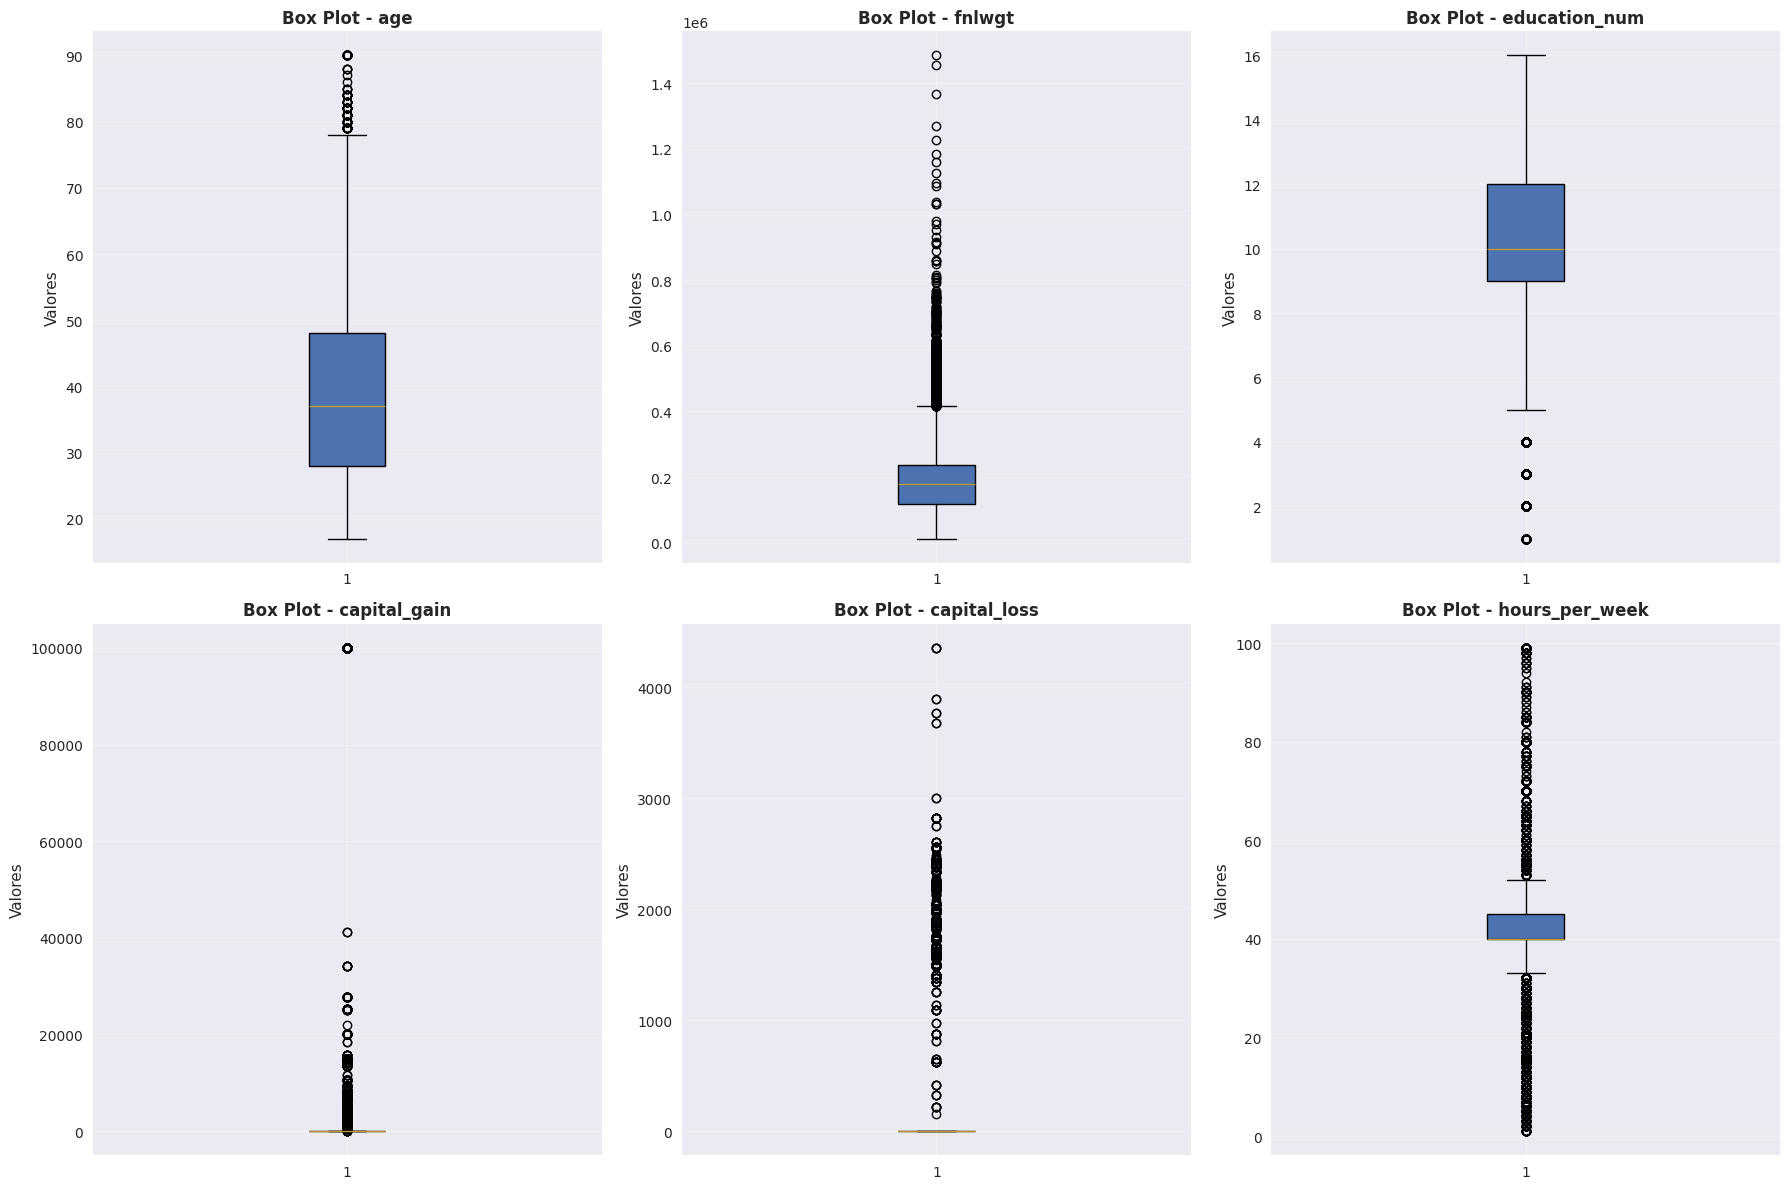


Análisis de outliers (valores fuera de Q1-1.5*IQR y Q3+1.5*IQR):
age: 143 outliers (0.44%)
fnlwgt: 992 outliers (3.05%)
education_num: 1198 outliers (3.68%)
capital_gain: 2712 outliers (8.33%)
capital_loss: 1519 outliers (4.67%)
hours_per_week: 9008 outliers (27.66%)


In [ ]:
# =============================================================================
# TAREA 7: BOX PLOTS DE VARIABLES NUMÉRICAS
# =============================================================================

# NOTAS: Esta celda crea box plots para visualizar la distribución de las variables numéricas
# y detectar outliers. Los box plots muestran la mediana, cuartiles y valores extremos de cada
# variable. También calcula estadísticamente cuántos outliers hay usando la regla estándar
# (valores fuera de Q1-1.5*IQR y Q3+1.5*IQR). Los outliers pueden indicar errores en los datos
# o casos especiales que merecen atención.

print("TAREA 7: BOX PLOTS")
print("="*50)
print("Objetivo: Ver la distribución de las variables y sus outliers")

# Variables para box plots (excluyendo income_binary que es binaria)
box_vars = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Crear subplots para box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Crea una grilla de 2x3 para los gráficos
axes = axes.ravel()  # Convierte la matriz 2D en un array 1D para iterar fácilmente

for i, var in enumerate(box_vars):
    axes[i].boxplot(df_clean[var], patch_artist=True)  # Crea el box plot para cada variable
    axes[i].set_title(f'Box Plot - {var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Valores')
    axes[i].grid(True, alpha=0.3)  # Agrega una grilla sutil para mejor legibilidad

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

# Mostrar estadísticas de outliers para cada variable
print("\nAnálisis de outliers (valores fuera de Q1-1.5*IQR y Q3+1.5*IQR):")
for var in box_vars:
    Q1 = df_clean[var].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df_clean[var].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior para outliers
    upper_bound = Q3 + 1.5 * IQR  # Límite superior para outliers
    
    outliers = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)]
    print(f"{var}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")


TAREA 8: GRÁFICOS DE BARRAS/PROPORCIÓN
Objetivo: Ver los porcentajes de cada una


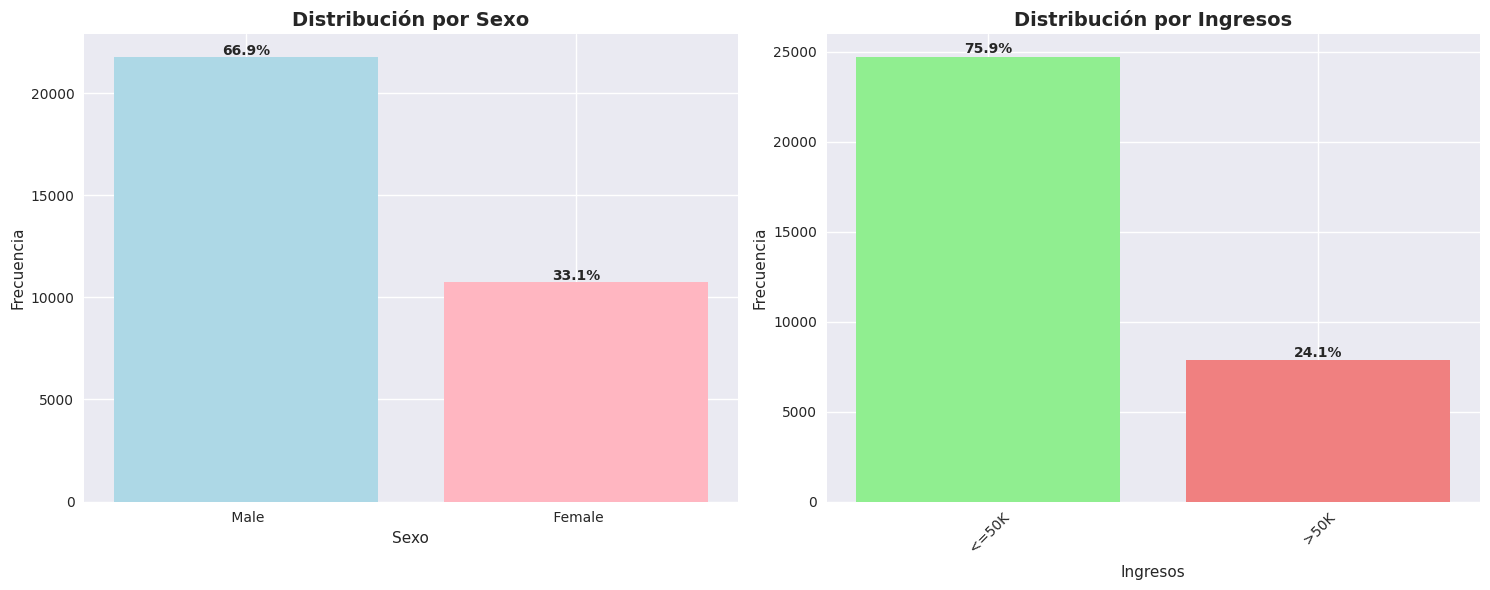

Distribución por sexo:
sex
Male      66.920549
Female    33.079451
Name: proportion, dtype: float64

Distribución por ingresos:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


In [ ]:
# =============================================================================
# TAREA 8: GRÁFICOS DE BARRAS/PROPORCIÓN PARA SEX E INCOME
# =============================================================================

# NOTAS: Esta celda crea gráficos de barras para las variables sex e income, mostrando tanto
# las frecuencias absolutas como los porcentajes. Estos gráficos son fundamentales para entender
# la distribución de las variables objetivo del análisis. Los porcentajes se muestran directamente
# en las barras para facilitar la interpretación.

print("TAREA 8: GRÁFICOS DE BARRAS/PROPORCIÓN")
print("="*50)
print("Objetivo: Ver los porcentajes de cada una")

# Gráfico para sex
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Crea dos subplots lado a lado

# Sex - Gráfico de barras con porcentajes
sex_counts = df_clean['sex'].value_counts()  # Frecuencias absolutas
sex_percentages = df_clean['sex'].value_counts(normalize=True) * 100  # Porcentajes

axes[0].bar(sex_counts.index, sex_counts.values, color=['lightblue', 'lightpink'])
axes[0].set_title('Distribución por Sexo', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlabel('Sexo')

# Agregar porcentajes en las barras
for i, (idx, val) in enumerate(sex_counts.items()):
    axes[0].text(i, val + 100, f'{sex_percentages[idx]:.1f}%', ha='center', fontweight='bold')

# Income - Gráfico de barras con porcentajes
income_counts = df_clean['income'].value_counts()  # Frecuencias absolutas
income_percentages = df_clean['income'].value_counts(normalize=True) * 100  # Porcentajes

axes[1].bar(income_counts.index, income_counts.values, color=['lightgreen', 'lightcoral'])
axes[1].set_title('Distribución por Ingresos', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlabel('Ingresos')
axes[1].tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad

# Agregar porcentajes en las barras
for i, (idx, val) in enumerate(income_counts.items()):
    axes[1].text(i, val + 200, f'{income_percentages[idx]:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

print(f"Distribución por sexo:")
print(sex_percentages)
print(f"\nDistribución por ingresos:")
print(income_percentages)


TAREA 9: GRÁFICOS DE BARRAS/TORTA
Objetivo: Ver las frecuencias


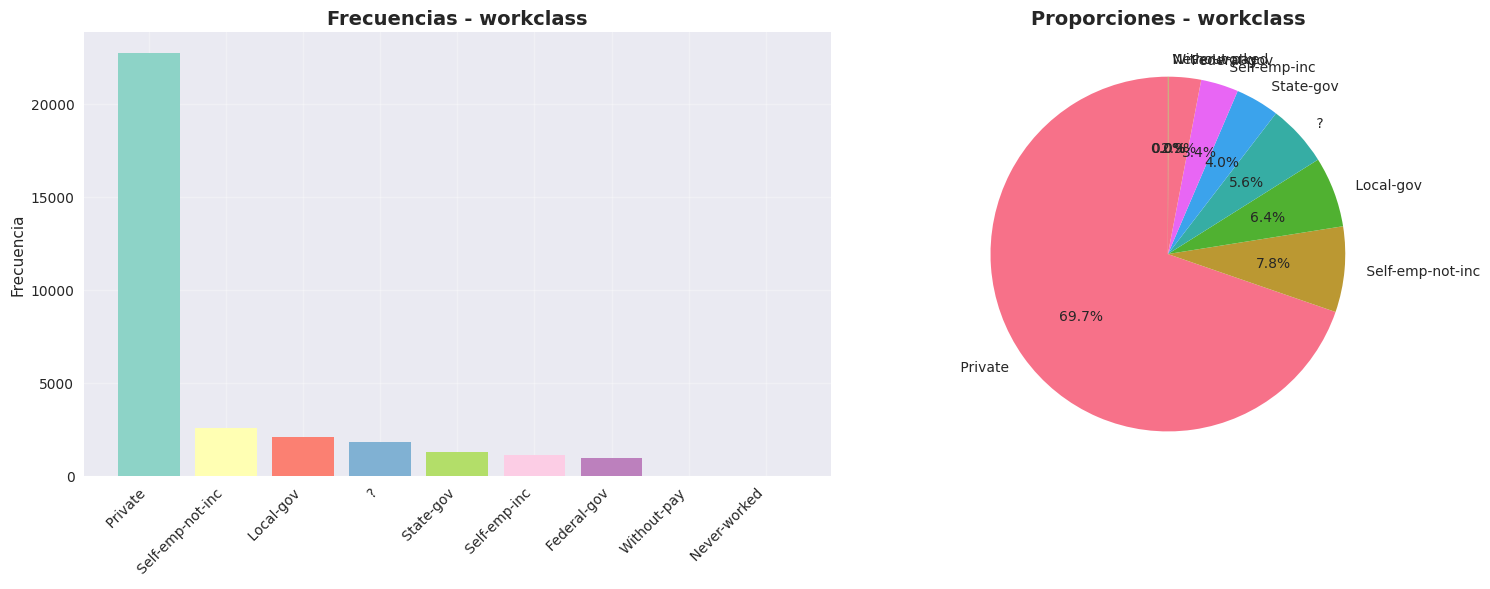


Frecuencias para workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------


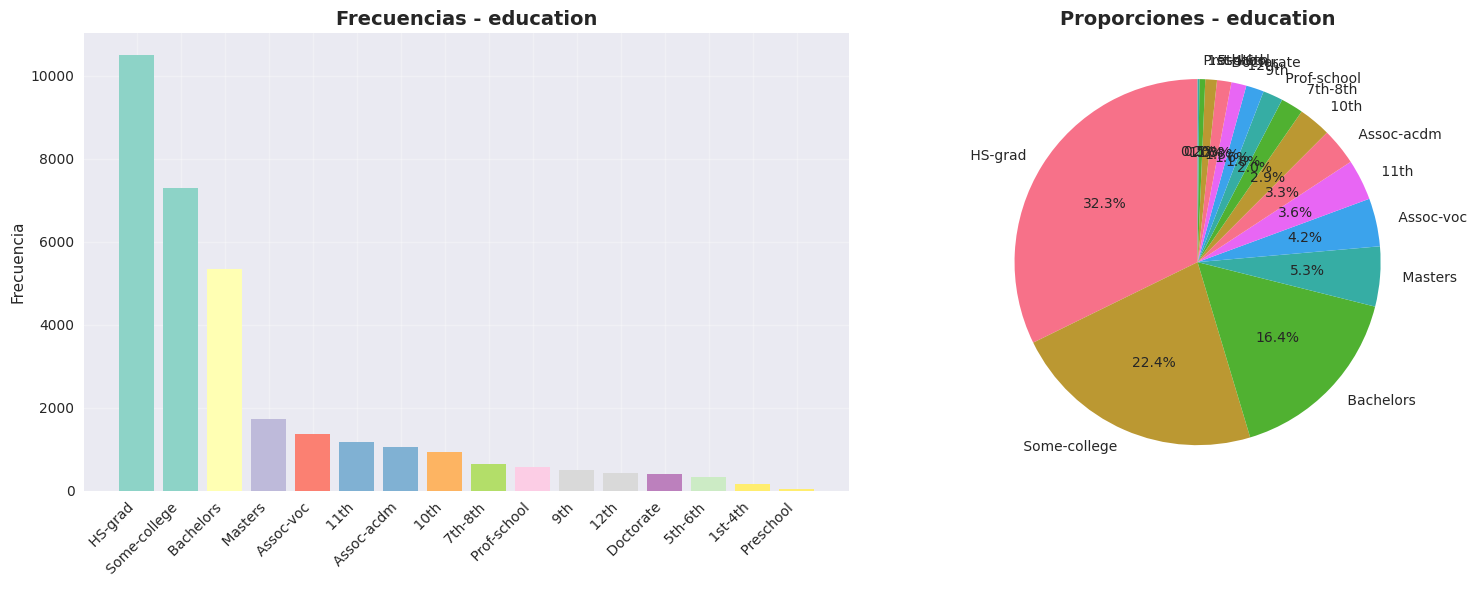


Frecuencias para education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
--------------------------------------------------


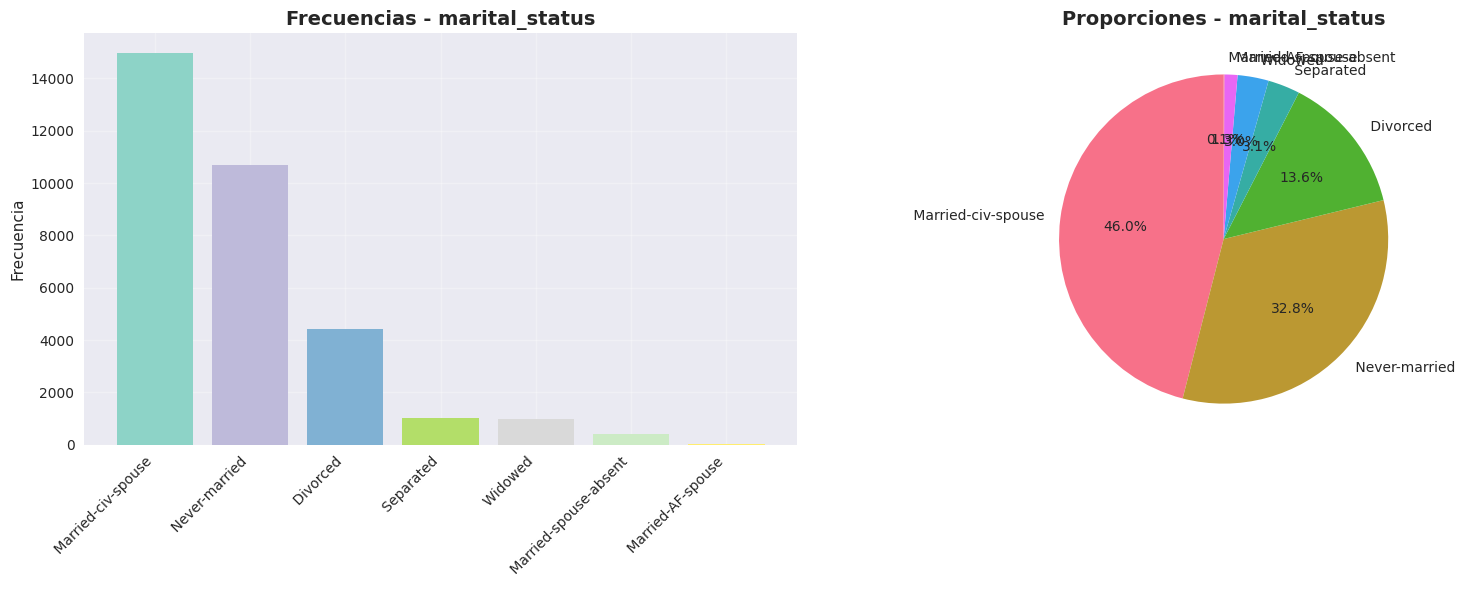


Frecuencias para marital_status:
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
--------------------------------------------------


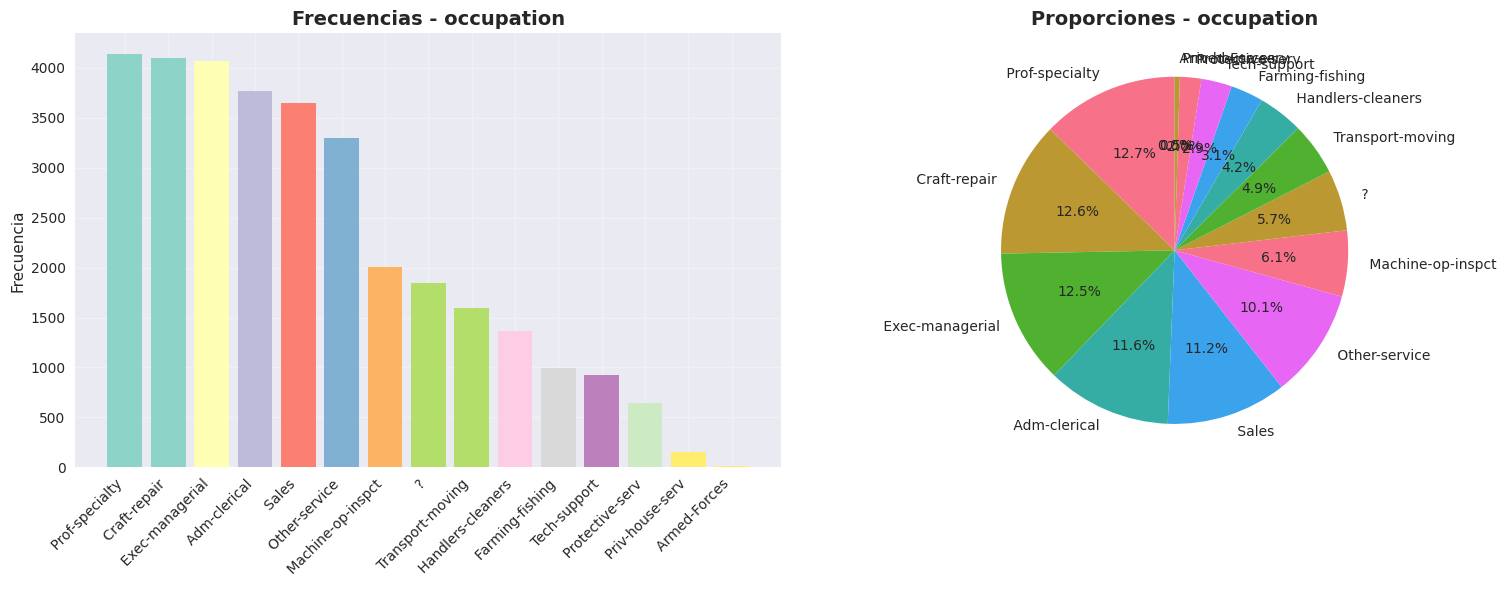


Frecuencias para occupation:
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
--------------------------------------------------


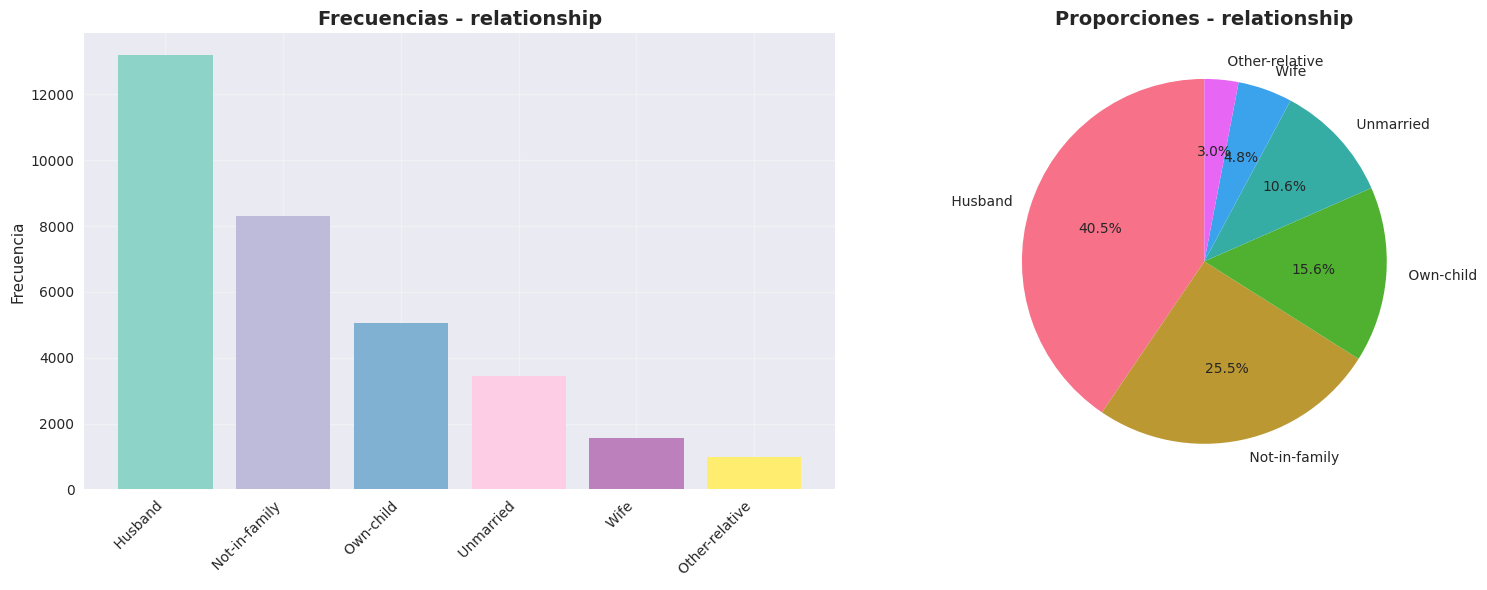


Frecuencias para relationship:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64
--------------------------------------------------


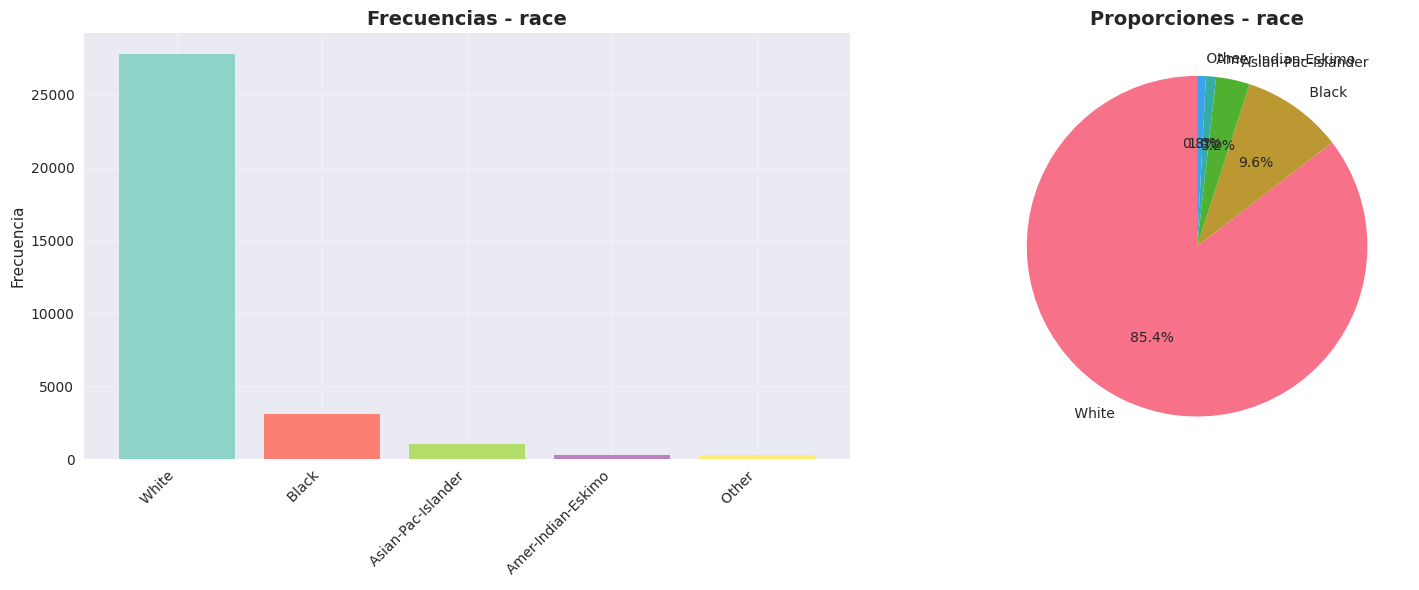


Frecuencias para race:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
--------------------------------------------------


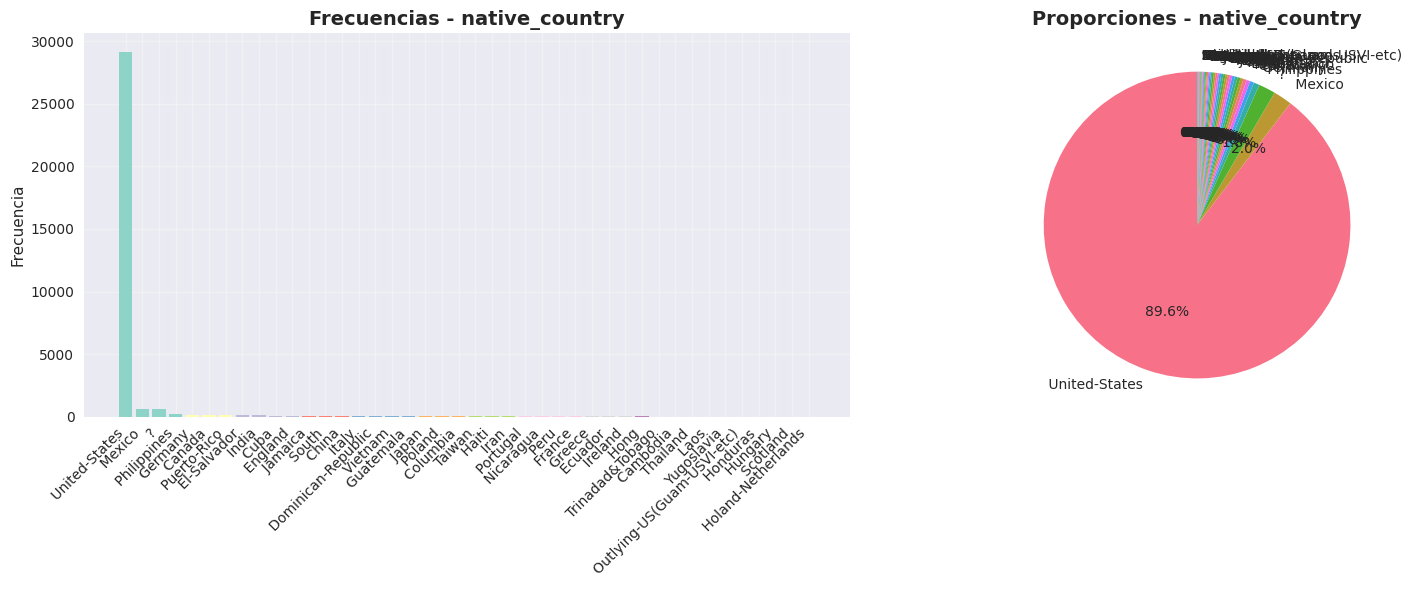


Frecuencias para native_country:
native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru           

In [ ]:
# =============================================================================
# TAREA 9: GRÁFICOS DE BARRAS/TORTA PARA VARIABLES CATEGÓRICAS
# =============================================================================

# NOTAS: Esta celda crea visualizaciones completas para todas las variables categóricas,
# mostrando tanto gráficos de barras (para comparar frecuencias) como gráficos de torta
# (para ver proporciones). Cada variable se visualiza en un par de gráficos que se muestran
# juntos para facilitar la comparación. Los colores se asignan automáticamente para
# distinguir las categorías.

print("TAREA 9: GRÁFICOS DE BARRAS/TORTA")
print("="*50)
print("Objetivo: Ver las frecuencias")

# Variables para gráficos de barras/torta
chart_vars = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

# Crear gráficos para cada variable
for var in chart_vars:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Dos subplots lado a lado
    
    # Gráfico de barras
    counts = df_clean[var].value_counts()  # Calcula frecuencias para cada categoría
    ax1.bar(range(len(counts)), counts.values, color=plt.cm.Set3(np.linspace(0, 1, len(counts))))
    ax1.set_title(f'Frecuencias - {var}', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Frecuencia')
    ax1.set_xticks(range(len(counts)))  # Posiciones de las etiquetas
    ax1.set_xticklabels(counts.index, rotation=45, ha='right')  # Etiquetas rotadas
    ax1.grid(True, alpha=0.3)  # Grilla sutil
    
    # Gráfico de torta
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'Proporciones - {var}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()  # Ajusta el espaciado
    plt.show()
    
    print(f"\nFrecuencias para {var}:")
    print(counts)
    print("-" * 50)


TAREA 10: MATRICES DE CORRELACIÓN
Matriz de correlación general:
                     age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education_num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital_gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital_loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours_per_week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours_per_week  
age                   0.068756  
fnlwgt               -0.018768  
education_num         0.148123  
capital_gain          0.078409  
capital_loss          0.054256  
hours_per_week        1.000000  


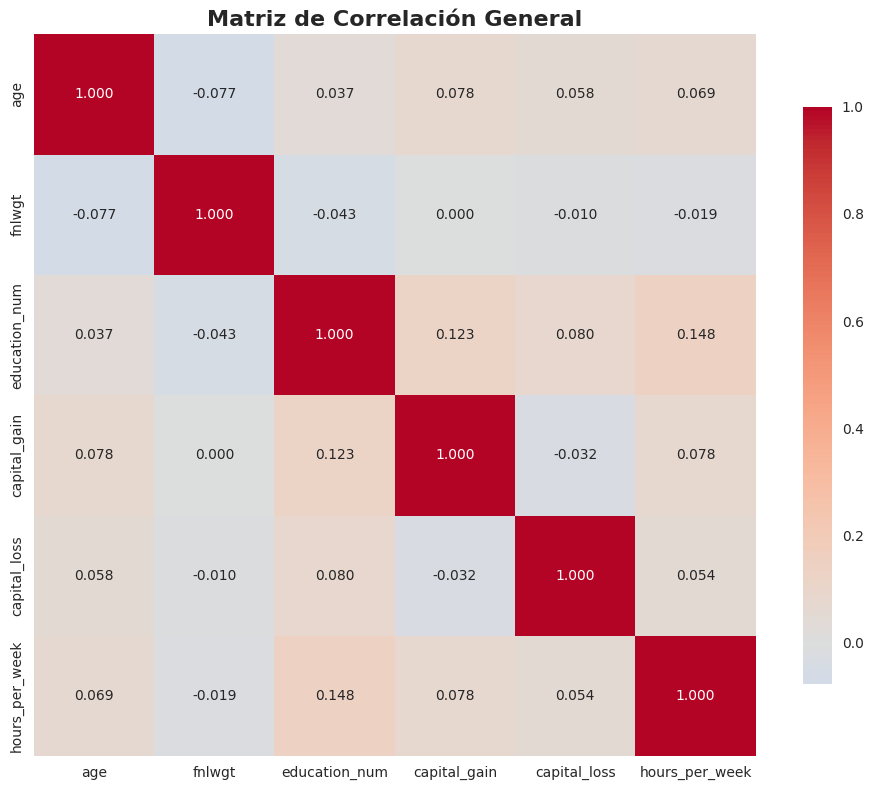

In [ ]:
# =============================================================================
# TAREA 10: MATRICES DE CORRELACIÓN DE PEARSON
# =============================================================================

# NOTAS: Esta celda calcula y visualiza la matriz de correlación de Pearson entre las variables
# numéricas. La correlación mide la relación lineal entre dos variables (valores entre -1 y 1).
# Un valor cercano a 1 indica correlación positiva fuerte, -1 indica correlación negativa fuerte,
# y 0 indica ausencia de correlación lineal. El heatmap visual facilita identificar patrones
# de correlación entre múltiples variables simultáneamente.

print("TAREA 10: MATRICES DE CORRELACIÓN")
print("="*50)

# Variables para correlación (excluyendo income_binary)
correlation_vars = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Matriz de correlación general
print("Matriz de correlación general:")
corr_matrix = df_clean[correlation_vars].corr(method='pearson')  # Calcula correlaciones de Pearson
print(corr_matrix)

# Crear visualización de la matriz de correlación general
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación General', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



Matrices de correlación separadas por income:

Matriz de correlación para income <= 50K:
                     age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education_num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital_gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital_loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours_per_week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours_per_week  
age                   0.068756  
fnlwgt               -0.018768  
education_num         0.148123  
capital_gain          0.078409  
capital_loss          0.054256  
hours_per_week        1.000000  

Matriz de correlación para income > 50K:
                age  fnlwgt  education_num  capital_gain  capital_los

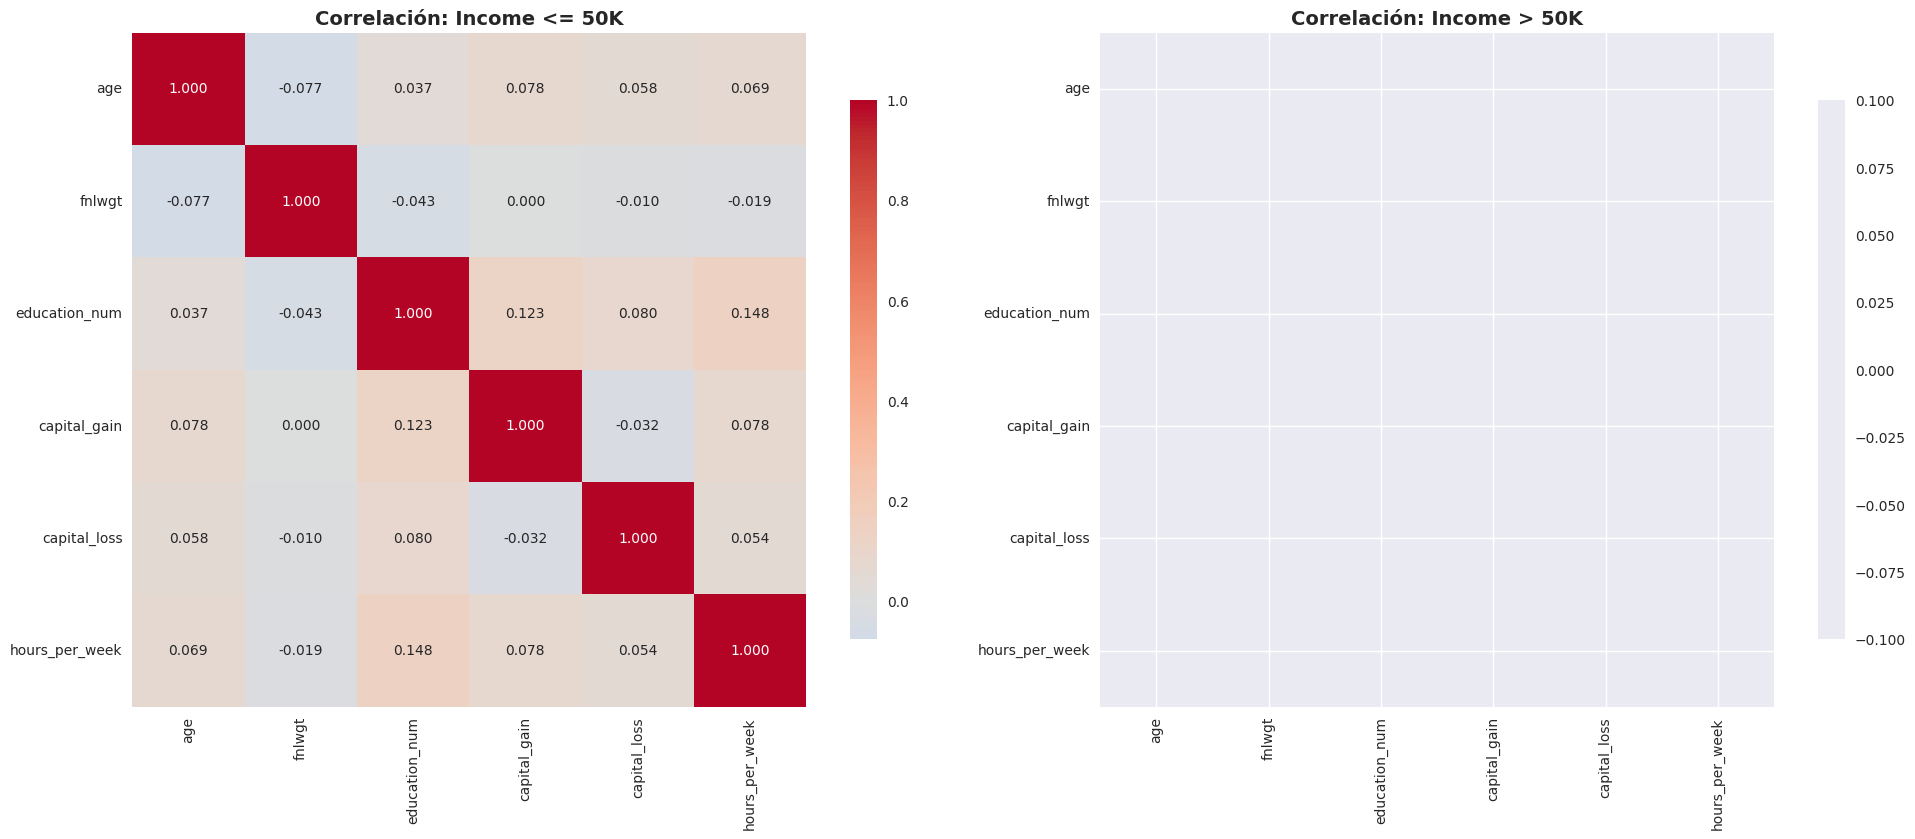


Tamaño de muestra para income <= 50K: 32561
Tamaño de muestra para income > 50K: 0


In [ ]:
# NOTAS: Esta celda calcula matrices de correlación separadas por grupos de income para
# analizar si las relaciones entre variables cambian según el nivel de ingresos. Esto es
# importante porque puede revelar patrones diferentes en cada grupo. Por ejemplo, la relación
# entre educación e ingresos puede ser diferente para personas de altos vs bajos ingresos.

# Matrices de correlación separadas por income
print("\nMatrices de correlación separadas por income:")

# Income = 0 (<=50K)
df_income_0 = df_clean[df_clean['income_binary'] == 0]  # Filtra personas con ingresos <= 50K
corr_income_0 = df_income_0[correlation_vars].corr(method='pearson')

print("\nMatriz de correlación para income <= 50K:")
print(corr_income_0)

# Income = 1 (>50K)
df_income_1 = df_clean[df_clean['income_binary'] == 1]  # Filtra personas con ingresos > 50K
corr_income_1 = df_income_1[correlation_vars].corr(method='pearson')

print("\nMatriz de correlación para income > 50K:")
print(corr_income_1)

# Visualizar ambas matrices
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Dos subplots lado a lado para comparar

# Matriz para income <= 50K
sns.heatmap(corr_income_0, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Correlación: Income <= 50K', fontsize=14, fontweight='bold')

# Matriz para income > 50K
sns.heatmap(corr_income_1, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', ax=axes[1], cbar_kws={'shrink': 0.8})
axes[1].set_title('Correlación: Income > 50K', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTamaño de muestra para income <= 50K: {len(df_income_0)}")
print(f"Tamaño de muestra para income > 50K: {len(df_income_1)}")


In [ ]:
# =============================================================================
# TAREA 11: TABLAS DE CONTINGENCIA PARA VARIABLES CATEGÓRICAS
# =============================================================================

# NOTAS: Esta celda crea tablas de contingencia para analizar las relaciones entre variables
# categóricas y la variable objetivo income. Las tablas de contingencia muestran cómo se
# distribuyen las categorías de una variable según las categorías de otra. Se calculan tres
# tipos: frecuencias absolutas, porcentajes por fila y porcentajes por columna, cada una
# proporcionando una perspectiva diferente de la relación entre las variables.

print("TAREA 11: TABLAS DE CONTINGENCIA")
print("="*50)

# Pares de variables para tablas de contingencia
contingency_pairs = [
    ('sex', 'income'),
    ('education', 'income'),
    ('workclass', 'income'),
    ('marital_status', 'income'),
    ('race', 'income')
]

for var1, var2 in contingency_pairs:
    print(f"\n{var1.upper()} vs {var2.upper()}:")
    print("-" * 40)
    
    # Tabla de contingencia con frecuencias absolutas
    contingency_table = pd.crosstab(df_clean[var1], df_clean[var2], margins=True)
    print("Frecuencias absolutas:")
    print(contingency_table)
    
    # Tabla de contingencia con porcentajes por fila
    contingency_pct_row = pd.crosstab(df_clean[var1], df_clean[var2], normalize='index') * 100
    print(f"\nPorcentajes por fila ({var1}):")
    print(contingency_pct_row.round(2))
    
    # Tabla de contingencia con porcentajes por columna
    contingency_pct_col = pd.crosstab(df_clean[var1], df_clean[var2], normalize='columns') * 100
    print(f"\nPorcentajes por columna ({var2}):")
    print(contingency_pct_col.round(2))
    
    print("\n" + "="*60)


TAREA 11: TABLAS DE CONTINGENCIA

SEX vs INCOME:
----------------------------------------
Frecuencias absolutas:
income    <=50K   >50K    All
sex                          
 Female    9592   1179  10771
 Male     15128   6662  21790
All       24720   7841  32561

Porcentajes por fila (sex):
income  <=50K   >50K
sex                 
Female  89.05  10.95
Male    69.43  30.57

Porcentajes por columna (income):
income  <=50K   >50K
sex                 
Female   38.8  15.04
Male     61.2  84.96


EDUCATION vs INCOME:
----------------------------------------
Frecuencias absolutas:
income          <=50K   >50K    All
education                          
 10th             871     62    933
 11th            1115     60   1175
 12th             400     33    433
 1st-4th          162      6    168
 5th-6th          317     16    333
 7th-8th          606     40    646
 9th              487     27    514
 Assoc-acdm       802    265   1067
 Assoc-voc       1021    361   1382
 Bachelors       3134 

In [ ]:
# =============================================================================
# RESUMEN FINAL DEL ANÁLISIS
# =============================================================================

# NOTAS: Esta celda final proporciona un resumen completo del análisis estadístico realizado.
# Muestra las dimensiones del dataset procesado, la distribución de la variable objetivo
# y confirma que todas las 11 tareas del proyecto han sido completadas exitosamente.
# Este resumen sirve como verificación final y documentación del trabajo realizado.

print("RESUMEN FINAL DEL ANÁLISIS")
print("="*50)

print(f"Dataset procesado: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")
print(f"Variables numéricas analizadas: {len(numerical_vars)}")
print(f"Variables categóricas analizadas: {len(categorical_vars)}")

print(f"\nDistribución de income:")
income_dist = df_clean['income'].value_counts(normalize=True) * 100
for category, percentage in income_dist.items():
    print(f"  {category}: {percentage:.2f}%")

print(f"\nAnálisis completado exitosamente!")
print("Todas las 11 tareas han sido implementadas:")
print("✓ Tareas 1-5: Estadísticas descriptivas")
print("✓ Tarea 6: Frecuencias de variables categóricas") 
print("✓ Tarea 7: Box plots")
print("✓ Tarea 8: Gráficos de barras/proporción")
print("✓ Tarea 9: Gráficos de barras/torta")
print("✓ Tarea 10: Matrices de correlación")
print("✓ Tarea 11: Tablas de contingencia")


RESUMEN FINAL DEL ANÁLISIS
Dataset procesado: 32561 filas, 16 columnas
Variables numéricas analizadas: 7
Variables categóricas analizadas: 8

Distribución de income:
   <=50K: 75.92%
   >50K: 24.08%

Análisis completado exitosamente!
Todas las 11 tareas han sido implementadas:
✓ Tareas 1-5: Estadísticas descriptivas
✓ Tarea 6: Frecuencias de variables categóricas
✓ Tarea 7: Box plots
✓ Tarea 8: Gráficos de barras/proporción
✓ Tarea 9: Gráficos de barras/torta
✓ Tarea 10: Matrices de correlación
✓ Tarea 11: Tablas de contingencia
